In [27]:
import numpy as np
import scipy as sp
from src.PLS.utils import mle
from src.PLS.baseSIR import timed_sir
from src.PLS.baseSIR import mle_sir
import time
import seaborn as sns
from decimal import Decimal, ROUND_UP
from matplotlib import pyplot as plt

In [28]:
X0 = [999, 1, 0]
gamma = 1
beta = 3
mu = 0
tstep = 0.05
test_time = 100
seed = 1
rng = np.random.default_rng(seed)
tmax = float(Decimal(tstep) * (Decimal(timed_sir(X0, mu, beta, gamma, test_time, rng) )/ Decimal(tstep)).quantize(1,rounding=ROUND_UP))
rng = np.random.default_rng(seed)
print(tmax)
start_time = time.time()
times, reality = mle_sir(X0, mu, beta, gamma, tmax, tstep, rng)
print(len(reality))
print(f"Reality took {time.time() - start_time} seconds to run!")

reality_100 = reality / 10
reality_100[:, 0] = np.floor(reality_100[:, 0])
reality_100[:, 0] = reality_100[:, 0].astype(int)
reality_100[:, 1] = np.ceil(reality_100[:, 1])
reality_100[:, 1] = reality_100[:, 1].astype(int)
reality_100[:, 2] = 100 - reality_100[:, 1] - reality_100[:, 0]
reality_100[:, 2] = reality_100[:, 2].astype(int)

reality_10 = reality / 100
reality_10[:, 0] = np.floor(reality_10[:, 0])
reality_10[:, 0] = reality_10[:, 0].astype(int)
reality_10[:, 1] = np.ceil(reality_10[:, 1])
reality_10[:, 1] = reality_10[:, 1].astype(int)
reality_10[:, 2] = 10 - reality_10[:, 1] - reality_10[:, 0]
reality_10[:, 2] = reality_10[:, 2].astype(int)

15.600000000000001
1926
Reality took 0.050570011138916016 seconds to run!


In [29]:
print(reality)

[[999   1   0]
 [998   2   0]
 [997   3   0]
 ...
 [ 37   2 961]
 [ 37   1 962]
 [ 37   0 963]]


In [30]:
betas = np.arange(1,10,0.01)
ml1000 = lambda x:mle(x,1,reality,times,tmax)
ml100 = lambda x:mle(x,1,reality_100,times,tmax)
ml10 = lambda x:mle(x,1,reality_10,times,tmax)
length_10 = len(np.unique(reality_10))
length_100 = len(np.unique(reality_100))
length_1000 = len(np.unique(reality))
mles_1000 = ml1000(betas)
mles_1000 += -max(mles_1000)
mles_1000 = mles_1000/length_1000
mles_100 = ml100(betas)
mles_100 += -max(mles_100)
mles_100 = mles_100/length_100
mles_10 = ml10(betas)
mles_10 += -max(mles_10)
mles_10 = mles_10/length_10

In [35]:
print(length_10)

11


C:\Users\ollie\AppData\Local\Temp\ipykernel_29544\2876389983.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


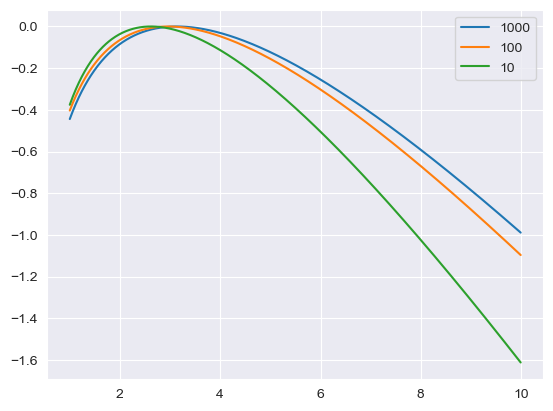

In [32]:
fig, ax0 = plt.subplots()
ax0.plot(betas,mles_1000,label="1000")
ax0.plot(betas,mles_100,label="100")
ax0.plot(betas,mles_10,label="10")
ax0.legend()
fig.show()